In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

c:\anaconda3\envs\std\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\anaconda3\envs\std\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\anaconda3\envs\std\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Text(0, 0.5, 'PC2')

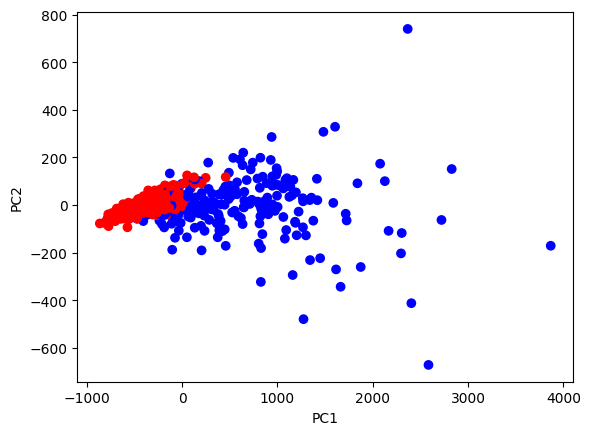

In [4]:
# 데이터 로드
data = load_breast_cancer()

# PCA 라이브러리 이용해서 2차원으로 축소
pca = PCA(n_components=2)
x_pca = pca.fit_transform(data.data)

# 클래스별 다른 색상으로 표시
colors = ['blue', 'red']
target_names = data.target_names
target_colors = {target_names[i]: colors[i] for i in range(len(target_names))}
target = data.target
labels = [target_names[i] for i in target]
colors = [target_colors[label] for label in labels]

# 시각화
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=colors)
plt.xlabel('PC1')
plt.ylabel('PC2')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

c:\anaconda3\envs\std\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\anaconda3\envs\std\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\anaconda3\envs\std\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# 데이터 로드 
data = load_breast_cancer()
df = pd.DataFrame(np.c_[data['data'], data['target']], columns=np.append(data['feature_names'], ['target']))

print(df.head())
print(df.info())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [3]:
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=77)

svm_model = SVC(kernel='linear', C=1.0, random_state=77)

# 모델 학습 하고 예측 수행 

svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9649122807017544
[[ 57   5]
 [  1 108]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        62
           1       0.96      0.99      0.97       109

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



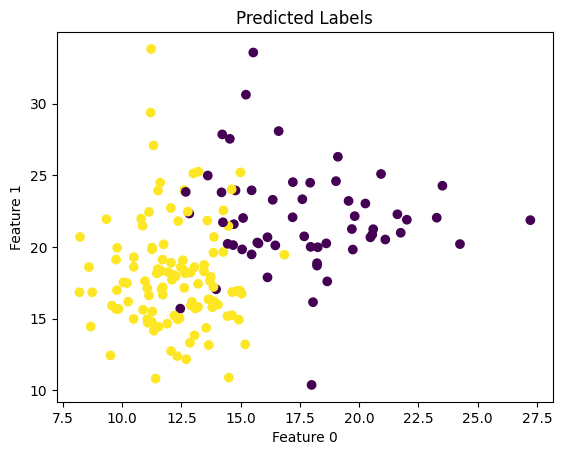

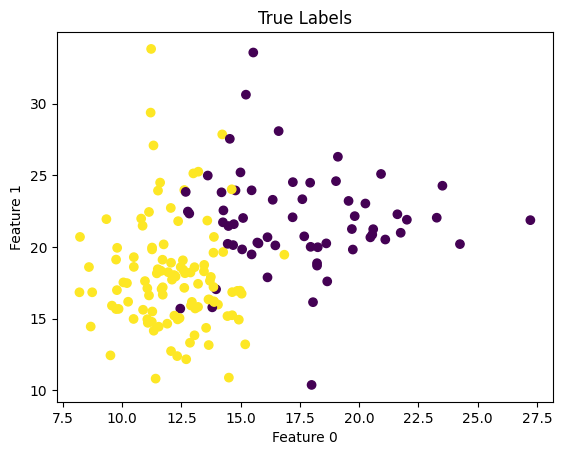

In [4]:
# 테스트 데이터 예측 결과 시각화
y_pred_test = svm_model.predict(x_test)

plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred_test)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Predicted Labels')
plt.show()

plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('True Labels')
plt.show()